Loading the data

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/timeseries/Alcohol_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [2]:
df.columns=['Date','Sales']

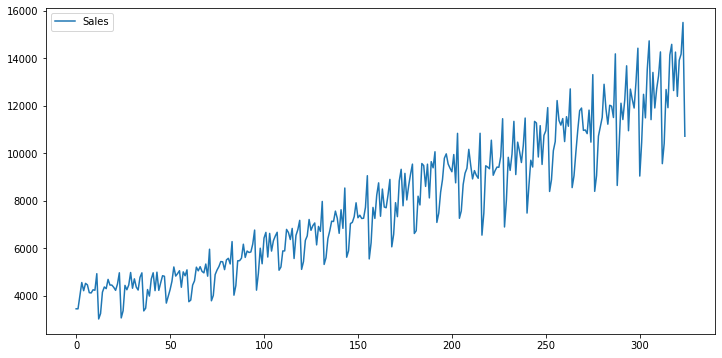

In [3]:
df.plot(figsize=(12,6))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    325 non-null    object
 1   Sales   325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


Time-Series using LSTM

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.95,shuffle=False)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
scaled_train=scaler.fit_transform(train['Sales'][:,np.newaxis])
scaled_test = scaler.fit_transform(test['Sales'][:,np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [9]:
from keras.preprocessing.sequence import TimeseriesGenerator
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [10]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855]
Predict this y: 
 [[0.13103684]]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [12]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(generator,epochs=200,verbose=1)

Epoch 1/200
305/305 [==============================] - 6s 13ms/step - loss: 0.0327
Epoch 2/200
305/305 [==============================] - 6s 19ms/step - loss: 0.0099
Epoch 3/200
305/305 [==============================] - 6s 18ms/step - loss: 0.0096
Epoch 4/200
305/305 [==============================] - 6s 18ms/step - loss: 0.0099
Epoch 5/200
305/305 [==============================] - 6s 18ms/step - loss: 0.0093
Epoch 6/200
305/305 [==============================] - 2s 8ms/step - loss: 0.0097
Epoch 7/200
305/305 [==============================] - 2s 8ms/step - loss: 0.0094
Epoch 8/200
305/305 [==============================] - 2s 8ms/step - loss: 0.0094
Epoch 9/200
305/305 [==============================] - 2s 8ms/step - loss: 0.0094
Epoch 10/200
305/305 [==============================] - 2s 8ms/step - loss: 0.0091
Epoch 11/200
305/305 [==============================] - 2s 8ms/step - loss: 0.0095
Epoch 12/200
305/305 [==============================] - 2s 8ms/step - loss: 0.0092
Epoch 13

In [14]:
from tqdm import tqdm
test_predictions = []
first_eval_batch = scaled_train[-n_input:,:,np.newaxis]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in tqdm(range(len(test))):
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

100%|██████████| 17/17 [00:01<00:00, 15.02it/s]


In [15]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[14587.64792347],
       [13995.14896059],
       [14586.26712227],
       [13960.12122059],
       [14176.91196585],
       [14104.23862839],
       [13879.66724539],
       [14052.78218651],
       [13805.76818132],
       [13882.26669216],
       [13761.32125282],
       [13750.62464619],
       [13657.1019187 ],
       [13645.91672087],
       [13561.70023942],
       [13559.18895149],
       [13481.9880023 ]])

In [16]:
test['Predictions'] = true_predictions

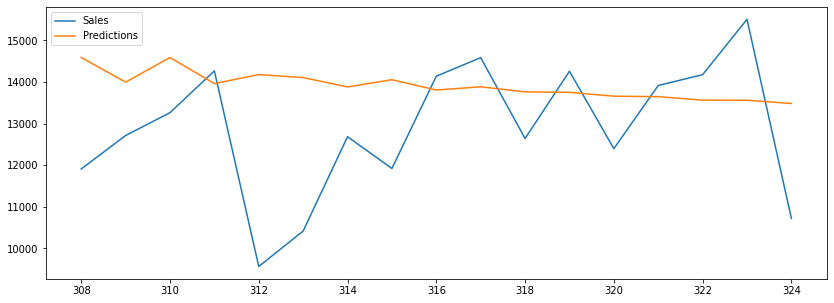

In [17]:
test.plot(figsize=(14,5))

### **ARIMA**

In [18]:
!pip install pmdarima
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/timeseries/Alcohol_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [20]:
df.columns=['Date','Sales']

In [21]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Sales'])

1. ADF :  2.037404725913703
2. P-Value :  0.9987196267088919
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


Transforming the data

In [22]:
df_diff=df['Sales'].diff().dropna()

In [23]:
ad_test(df_diff)

1. ADF :  -4.365959619246081
2. P-Value :  0.0003408284921169623
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


In [24]:
df['new_sale']=df_diff
df

,Date,Sales,new_sale
0,1992-01-01,3459,NaN
1,1992-02-01,3458,-1.0
2,1992-03-01,4002,544.0
3,1992-04-01,4564,562.0
4,1992-05-01,4221,-343.0
...,...,...,...
320,2018-09-01,12396,-1861.0
321,2018-10-01,13914,1518.0
322,2018-11-01,14174,260.0
323,2018-12-01,15504,1330.0


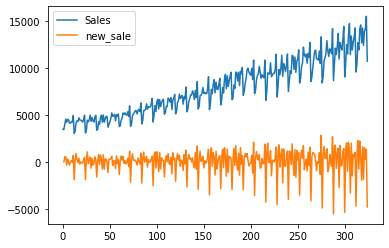

In [25]:
df.plot()

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.95,shuffle=False)

In [27]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
df['new_sale'][1:]

1        -1.0
2       544.0
3       562.0
4      -343.0
5       308.0
        ...  
320   -1861.0
321    1518.0
322     260.0
323    1330.0
324   -4786.0
Name: new_sale, Length: 324, dtype: float64

In [29]:
stepwise_fit = auto_arima(df['new_sale'][1:], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  324
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2687.767
Date:                Sat, 16 Jul 2022   AIC                           5385.534
Time:                        14:24:44   BIC                           5404.438
Sample:                             0   HQIC                          5393.079
                                - 324                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     57.7193      5.633     10.247      0.000      46.680      68.759
ar.L1         -0.9992      0.008   -125.093      0.000      -1.015      -0.984
ma.L1          0.0348      0.031      1.121      0.262      -0.026       0.096
ma.L2         -0.9437      0.033    -28.297      0.000      -1.009      -0.878
sigma2      9.287e+05      0.000    8.8e+09      0.000    9.29e+05    9.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.90   Jarque-Bera (JB):                17.34
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               4.82   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+25. Standard errors may be unstable.
"""

In [30]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q=1,0,2
model=ARIMA(train['new_sale'],order=(p,d,q)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               new_sale   No. Observations:                  308
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2538.918
Date:                Sat, 16 Jul 2022   AIC                           5087.836
Time:                        14:24:44   BIC                           5106.486
Sample:                             0   HQIC                          5095.293
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1462      2.591     10.865      0.000      23.069      33.224
ar.L1         -0.4363      0.621     -0.703      0.482      -1.653       0.781
ma.L1         -0.4306      0.597     -0.721      0.471      -1.601       0.740
ma.L2         -0.5129      0.567     -0.904      0.366      -1.625       0.599
sigma2      8.857e+05   6.29e+04     14.091      0.000    7.62e+05    1.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                40.76
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               4.64   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

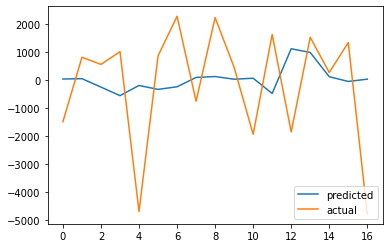

In [31]:
import matplotlib.pyplot as plt
start=1
end=len(test)
pred=model.predict(start=start,end=end).rename('ARIMA')
pred=pred.reset_index(drop=True)
test=test.reset_index(drop=True)
plt.plot(pred)
plt.plot(test['new_sale'])
plt.legend(["predicted", "actual"], loc ="lower right")
plt.show()

### Time Series Classification with TSAI 🔥

[TSAI](https://https://timeseriesai.github.io/tsai/)
---



In [32]:
!pip install tsai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from tsai.all import *
computer_setup()

os             : Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.13
tsai           : 0.3.1
fastai         : 2.7.6
fastcore       : 1.4.5
torch          : 1.11.0+cu102
device         : 1 gpu (['Tesla T4'])
cpu cores      : 2
RAM            : 12.68 GB
GPU memory     : [14.75] GB


In [34]:
#import dataset
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/tss/train_data.csv')
df

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f42,f43,f44,f45,f46,f47,f48,f49,f50,target
0,n0d752bda055a4b2,0.52843,0.66492,0.57300,0.25224,0.39213,0.56593,0.27157,0.67453,0.55690,...,0.21561,0.65484,0.47571,0.42559,0.42302,0.47089,0.57277,0.46133,0.40266,0
1,n78c526e96e3444a,0.50478,0.53147,0.46412,0.38045,0.52160,0.50398,0.60157,0.44022,0.48668,...,0.65698,0.62031,0.59613,0.45587,0.59785,0.51325,0.47258,0.46820,0.40191,0
2,n124153d6a80b41e,0.16432,0.30201,0.43268,0.76786,0.58864,0.24046,0.46519,0.63948,0.50190,...,0.48324,0.37271,0.19784,0.42810,0.43532,0.45287,0.57780,0.67637,0.59250,0
3,n8d840c1eca9947c,0.39355,0.33501,0.76737,0.57453,0.58991,0.49938,0.42713,0.71836,0.47394,...,0.54231,0.16994,0.31166,0.66766,0.57910,0.78467,0.31459,0.39186,0.75009,0
4,n9085bca7d6274e8,0.30337,0.62905,0.70896,0.35969,0.45878,0.56114,0.45075,0.61684,0.58865,...,0.52879,0.40566,0.35881,0.59963,0.40364,0.56930,0.48503,0.50755,0.49024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,nb348479cd6a845d,0.37901,0.45696,0.61736,0.53728,0.61759,0.41462,0.43887,0.70277,0.46605,...,0.44578,0.23482,0.25128,0.61243,0.37383,0.67132,0.25629,0.47408,0.63886,0
23995,n67cafe262c6c474,0.56883,0.44626,0.47341,0.36340,0.55763,0.45206,0.56804,0.71538,0.47531,...,0.35074,0.32829,0.44883,0.69204,0.44165,0.66043,0.49308,0.48315,0.50984,0
23996,n37527894cc5841a,0.44429,0.39712,0.39948,0.44728,0.45539,0.52379,0.62583,0.55642,0.63081,...,0.50469,0.56407,0.56469,0.50169,0.59774,0.53069,0.70013,0.65090,0.64804,1
23997,na247497ad9304da,0.63598,0.23455,0.37518,0.40339,0.63761,0.50392,0.81634,0.63413,0.57206,...,0.62303,0.56474,0.62624,0.49364,0.54827,0.63880,0.57199,0.44637,0.48424,1


In [35]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [36]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8,shuffle=False)

In [37]:
batch_tfms = TSStandardize()

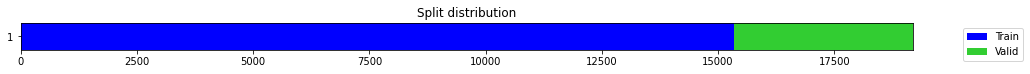

In [38]:
my_clf = TSClassifier(train_x,train_y, arch='MLSTM_FCN', batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())

lf_max = 5.754399353463668e-06


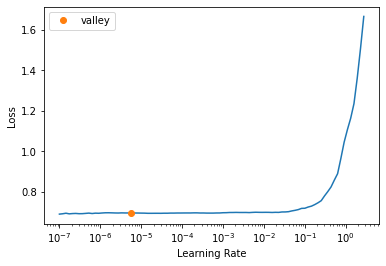

In [39]:
lr_max = my_clf.lr_find()
print(f'lf_max = {lr_max.valley}')

epoch,train_loss,valid_loss,accuracy,time
0,0.696507,0.694775,0.488281,00:04
1,0.694918,0.693527,0.496354,00:07
2,0.693056,0.692996,0.502604,00:07
3,0.694722,0.692615,0.513542,00:08
4,0.692632,0.692557,0.508073,00:07
5,0.693368,0.692389,0.513281,00:06
6,0.692846,0.692312,0.514323,00:03
7,0.693436,0.692262,0.515365,00:03
8,0.694535,0.692271,0.515104,00:03
9,0.691521,0.692267,0.513802,00:03


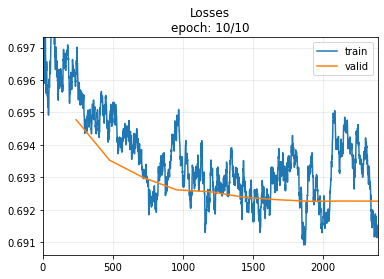

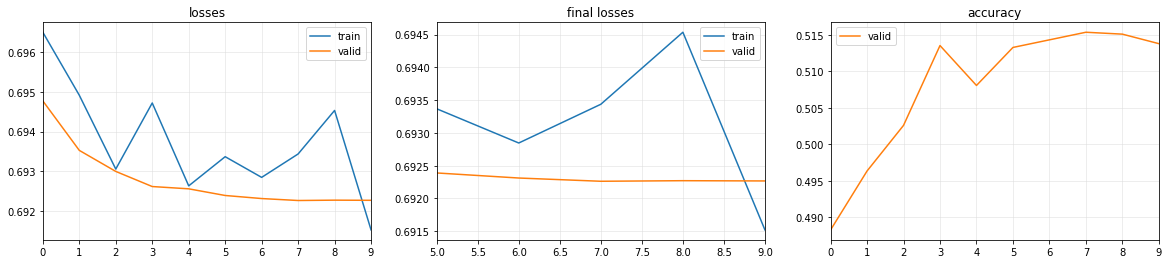

In [40]:
my_clf.fit_one_cycle(10, lr_max=lr_max.valley)

#### save and load model

In [41]:
my_clf.export("models/mv_clf.pkl")
from tsai.inference import load_learner
loaded_clf = load_learner("models/mv_clf.pkl")

In [42]:
#reshaping for passing on sample at a time in predictor
x_test= test_x.reshape(-1,1,50)

In [43]:
probas,target, preds = loaded_clf.get_X_preds(x_test,test_y)
probas,target, preds

(TensorBase([[0.5145, 0.4855],
         [0.5141, 0.4859],
         [0.5331, 0.4669],
         ...,
         [0.5055, 0.4945],
         [0.5660, 0.4340],
         [0.4957, 0.5043]]),
 tensor([0, 0, 1,  ..., 1, 1, 0]),
 array(['0', '0', '0', ..., '0', '0', '1'], dtype='<U1'))

In [44]:
r=pd.DataFrame(preds)
r

,0
0,0
1,0
2,0
3,0
4,0
...,...
4795,0
4796,0
4797,0
4798,0


In [45]:
r[0] = r[0].astype(int)
r.dtypes

0    int64
dtype: object

In [46]:
r[0].value_counts()

0    2557
1    2243
Name: 0, dtype: int64

In [47]:
from sklearn.metrics import classification_report
print(classification_report(test_y, r[0]))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      2456
           1       0.49      0.47      0.48      2344

    accuracy                           0.51      4800
   macro avg       0.51      0.51      0.51      4800
weighted avg       0.51      0.51      0.51      4800

